In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Esimo įvykių statistikos duomenys : https://data.gov.lt/datasets/509/ ;
# Pritaikyti ML jog nustatytumėte, ar tai buvo susidūrimas su gyvūnu?
# Ar galite nustatyti kaltininko lytį, pagal pateiktas eismo įvykio aplinkybes? 
# Hipotezė - vyrai daro daugiau vienos rūšies klaidų, moterys - kitos.

In [84]:
df = pd.read_json(r"C:\Users\Batia\Downloads\ei_2022_12_31(1).json")

In [52]:
df

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-22-9565141,2021-12-31 22:00,2022-01-01 00:30,2022-01-01 00:39,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,"Nuvažiavimai nuo kelio į kairę, kai kelio ving...",1.0,0,...,None,1,50.0,Ne,Ne,Ne,6083759.0,491606.0,"[{'dalyvisId': 47756477, 'kategorija': 'Automo...","[{'tpId': 32912177, 'regValstybe': 'Lietuva', ..."
1,07-22-9565142,2022-01-01 00:40,2022-01-01 01:28,2022-01-03 13:49,0,Susidūrimas,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2.0,0,...,None,1,20.0,Ne,Ne,Ne,6181902.0,317439.0,"[{'dalyvisId': 47759080, 'kategorija': 'Automo...","[{'tpId': 32913457, 'regValstybe': 'Lietuva', ..."
2,07-22-9565143,2022-01-01 02:02,2022-01-01 02:29,2022-01-01 02:29,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Užvažiavimas ant gyvūno,1.0,0,...,None,1,90.0,Ne,Ne,Ne,6161589.0,333263.0,"[{'dalyvisId': 47756490, 'kategorija': 'Automo...","[{'tpId': 32912184, 'regValstybe': 'Lietuva', ..."
3,07-22-9565144,2022-01-01 01:53,2022-01-01 02:34,2022-12-20 09:44,0,Apvirtimas,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1.0,0,...,None,1,90.0,Ne,Ne,Ne,6104844.0,630436.0,"[{'dalyvisId': 48447053, 'kategorija': 'Automo...","[{'tpId': 33386413, 'regValstybe': 'Lietuva', ..."
4,07-22-9565145,2021-12-31 12:35,2022-01-01 02:52,2022-01-01 02:55,0,Užvažiavimas ant kliūties,Kiti eismo įvykiai,Kiti eismo įvykiai,1.0,0,...,None,1,50.0,Taip,Ne,Ne,6102529.0,495530.0,"[{'dalyvisId': 47756497, 'kategorija': 'Automo...","[{'tpId': 32912187, 'regValstybe': 'Lietuva', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,07-22-9588940,2022-12-31 19:40,2022-12-31 20:15,2022-12-31 21:45,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Užvažiavimas ant gyvūno,1.0,0,...,None,1,90.0,Ne,Ne,Ne,6060864.0,483320.0,"[{'dalyvisId': 48474241, 'kategorija': 'Automo...","[{'tpId': 33416356, 'regValstybe': 'Lietuva', ..."
23516,07-22-9588941,2022-12-31 17:35,2022-12-31 20:20,2023-01-06 08:09,0,Susidūrimas,Priešpriešiniai susidūrimai,Priešpriešinis susidūrimas,2.0,0,...,None,1,90.0,Taip,Ne,Ne,6218953.0,589894.0,"[{'dalyvisId': 48489943, 'kategorija': 'Automo...","[{'tpId': 33427877, 'regValstybe': 'Lietuva', ..."
23517,07-22-9588942,2022-12-31 20:00,2022-12-31 20:52,2022-12-31 20:44,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Užvažiavimas ant gyvūno,1.0,0,...,None,1,90.0,Ne,Ne,Ne,6127284.0,504282.0,"[{'dalyvisId': 48474207, 'kategorija': 'Automo...","[{'tpId': 33415862, 'regValstybe': 'Lietuva', ..."
23518,07-22-9588943,2022-12-31 19:20,2022-12-31 21:15,2022-12-31 21:22,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Užvažiavimas ant važiuojamoje dalyje esančios ...,1.0,0,...,None,1,70.0,Ne,Ne,Ne,6126630.0,551706.0,"[{'dalyvisId': 48474230, 'kategorija': 'Automo...","[{'tpId': 33415874, 'regValstybe': 'Lietuva', ..."


In [6]:
df.shape

(23520, 52)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   registrokodas                 23520 non-null  object 
 1   dataLaikas                    23520 non-null  object 
 2   registravimoData              23520 non-null  object 
 3   paskutinioRedagavimoLaikas    23510 non-null  object 
 4   iskaitinis                    23520 non-null  int64  
 5   rusis                         23510 non-null  object 
 6   schema1                       23510 non-null  object 
 7   schema2                       23510 non-null  object 
 8   dalyviuSkaicius               23510 non-null  float64
 9   zuvusiuSkaicius               23520 non-null  int64  
 10  zuvVaiku                      23520 non-null  int64  
 11  suzeistuSkaicius              23520 non-null  int64  
 12  suzeistaVaiku                 23520 non-null  int64  
 13  t

In [8]:
df.select_dtypes(include=['object']).columns

Index(['registrokodas', 'dataLaikas', 'registravimoData',
       'paskutinioRedagavimoLaikas', 'rusis', 'schema1', 'schema2',
       'policijosIstaigaL1', 'policijosIstaigaL2', 'iforminusiIstaigaL1',
       'iforminusiIstaigaL2', 'ivykioVieta', 'vietosSavivaldybeTipas',
       'savivaldybe', 'gatve', 'namas', 'kitaGatveSankryzoje',
       'kelioPavadinimas', 'kelioReiksme', 'dangosRusis', 'dangosBukle',
       'parosMetas', 'kelioApsvietimas', 'meteoSalygos', 'kitosOroSalygos',
       'kelioGatvesKreive', 'nuliamentisVeiksnys', 'kitiNuliamentysVeiksniai',
       'atitvarai', 'sankryzosTipas', 'kelioElementas1', 'kelioElementas2',
       'neblaivusKaltininkai', 'apsvaigeKaltininkai',
       'atsisakeTikrintisKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone'],
      dtype='object')

In [9]:
len(df.select_dtypes(include=['object']).columns)

37

In [12]:
df.select_dtypes(include=['int64','float64']).columns

Index(['iskaitinis', 'dalyviuSkaicius', 'zuvusiuSkaicius', 'zuvVaiku',
       'suzeistuSkaicius', 'suzeistaVaiku', 'tpSkaicius',
       'policijosTpSkaicius', 'apgadintuTpSkaicius',
       'apgadintuPolicijosTpSkaicius', 'atstumas',
       'privalomasLeistinasGreitis', 'leistinasGreitis', 'ilguma', 'platuma'],
      dtype='object')

In [13]:
len(df.select_dtypes(include=['int64','float64']).columns)

15

In [14]:
df.isnull().values.any()

True

In [18]:
df.isnull().values.sum()

0

In [16]:
df.columns[df.isnull().any()]

Index(['paskutinioRedagavimoLaikas', 'rusis', 'schema1', 'schema2',
       'dalyviuSkaicius', 'tpSkaicius', 'policijosTpSkaicius',
       'apgadintuTpSkaicius', 'apgadintuPolicijosTpSkaicius',
       'policijosIstaigaL2', 'iforminusiIstaigaL1', 'iforminusiIstaigaL2',
       'vietosSavivaldybeTipas', 'gatve', 'namas', 'kitaGatveSankryzoje',
       'kelioPavadinimas', 'kelioReiksme', 'atstumas', 'dangosRusis',
       'dangosBukle', 'parosMetas', 'kelioApsvietimas', 'meteoSalygos',
       'kelioGatvesKreive', 'nuliamentisVeiksnys', 'atitvarai',
       'sankryzosTipas', 'kelioElementas1', 'kelioElementas2',
       'leistinasGreitis', 'ilguma', 'platuma'],
      dtype='object')

In [26]:
df.dropna(inplace=True)

In [53]:

list_columns = df.select_dtypes(include=['object']).applymap(lambda x: isinstance(x, list)).any()
for col in list_columns.index:
	if list_columns[col]:
		df[col] = df[col].apply(lambda x: str(x) if isinstance(x, list) else x)


df = pd.get_dummies(data=df, drop_first=True)

C:\Users\Batia\AppData\Local\Temp\ipykernel_23972\3041237978.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  list_columns = df.select_dtypes(include=['object']).applymap(lambda x: isinstance(x, list)).any()


In [38]:
df

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-22-9565141,2021-12-31 22:00,2022-01-01 00:30,2022-01-01 00:39,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,"Nuvažiavimai nuo kelio į kairę, kai kelio ving...",1.0,0,...,None,1,50.0,Ne,Ne,Ne,6083759.0,491606.0,"[{'dalyvisId': 47756477, 'kategorija': 'Automo...","[{'tpId': 32912177, 'regValstybe': 'Lietuva', ..."
1,07-22-9565142,2022-01-01 00:40,2022-01-01 01:28,2022-01-03 13:49,0,Susidūrimas,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2.0,0,...,None,1,20.0,Ne,Ne,Ne,6181902.0,317439.0,"[{'dalyvisId': 47759080, 'kategorija': 'Automo...","[{'tpId': 32913457, 'regValstybe': 'Lietuva', ..."
2,07-22-9565143,2022-01-01 02:02,2022-01-01 02:29,2022-01-01 02:29,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Užvažiavimas ant gyvūno,1.0,0,...,None,1,90.0,Ne,Ne,Ne,6161589.0,333263.0,"[{'dalyvisId': 47756490, 'kategorija': 'Automo...","[{'tpId': 32912184, 'regValstybe': 'Lietuva', ..."
3,07-22-9565144,2022-01-01 01:53,2022-01-01 02:34,2022-12-20 09:44,0,Apvirtimas,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1.0,0,...,None,1,90.0,Ne,Ne,Ne,6104844.0,630436.0,"[{'dalyvisId': 48447053, 'kategorija': 'Automo...","[{'tpId': 33386413, 'regValstybe': 'Lietuva', ..."
4,07-22-9565145,2021-12-31 12:35,2022-01-01 02:52,2022-01-01 02:55,0,Užvažiavimas ant kliūties,Kiti eismo įvykiai,Kiti eismo įvykiai,1.0,0,...,None,1,50.0,Taip,Ne,Ne,6102529.0,495530.0,"[{'dalyvisId': 47756497, 'kategorija': 'Automo...","[{'tpId': 32912187, 'regValstybe': 'Lietuva', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,07-22-9588940,2022-12-31 19:40,2022-12-31 20:15,2022-12-31 21:45,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Užvažiavimas ant gyvūno,1.0,0,...,None,1,90.0,Ne,Ne,Ne,6060864.0,483320.0,"[{'dalyvisId': 48474241, 'kategorija': 'Automo...","[{'tpId': 33416356, 'regValstybe': 'Lietuva', ..."
23516,07-22-9588941,2022-12-31 17:35,2022-12-31 20:20,2023-01-06 08:09,0,Susidūrimas,Priešpriešiniai susidūrimai,Priešpriešinis susidūrimas,2.0,0,...,None,1,90.0,Taip,Ne,Ne,6218953.0,589894.0,"[{'dalyvisId': 48489943, 'kategorija': 'Automo...","[{'tpId': 33427877, 'regValstybe': 'Lietuva', ..."
23517,07-22-9588942,2022-12-31 20:00,2022-12-31 20:52,2022-12-31 20:44,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Užvažiavimas ant gyvūno,1.0,0,...,None,1,90.0,Ne,Ne,Ne,6127284.0,504282.0,"[{'dalyvisId': 48474207, 'kategorija': 'Automo...","[{'tpId': 33415862, 'regValstybe': 'Lietuva', ..."
23518,07-22-9588943,2022-12-31 19:20,2022-12-31 21:15,2022-12-31 21:22,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Užvažiavimas ant važiuojamoje dalyje esančios ...,1.0,0,...,None,1,70.0,Ne,Ne,Ne,6126630.0,551706.0,"[{'dalyvisId': 48474230, 'kategorija': 'Automo...","[{'tpId': 33415874, 'regValstybe': 'Lietuva', ..."


In [37]:
from sklearn.preprocessing import LabelEncoder

In [92]:
columns_to_encode = ['registrokodas', 'dataLaikas', 'registravimoData',
       'paskutinioRedagavimoLaikas', 'rusis', 'schema1', 'schema2',
       'policijosIstaigaL1', 'policijosIstaigaL2', 'iforminusiIstaigaL1',
       'iforminusiIstaigaL2', 'ivykioVieta', 'vietosSavivaldybeTipas',
       'savivaldybe', 'gatve', 'namas', 'kitaGatveSankryzoje',
       'kelioPavadinimas', 'kelioReiksme', 'dangosRusis', 'dangosBukle',
       'parosMetas', 'kelioApsvietimas', 'meteoSalygos', 'kitosOroSalygos',
       'kelioGatvesKreive', 'nuliamentisVeiksnys', 'kitiNuliamentysVeiksniai',
       'atitvarai', 'sankryzosTipas', 'kelioElementas1', 'kelioElementas2',
       'neblaivusKaltininkai', 'apsvaigeKaltininkai',
       'atsisakeTikrintisKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'lytis']


for col in columns_to_encode:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, list) else x)

df[columns_to_encode] = df[columns_to_encode].apply(LabelEncoder().fit_transform)


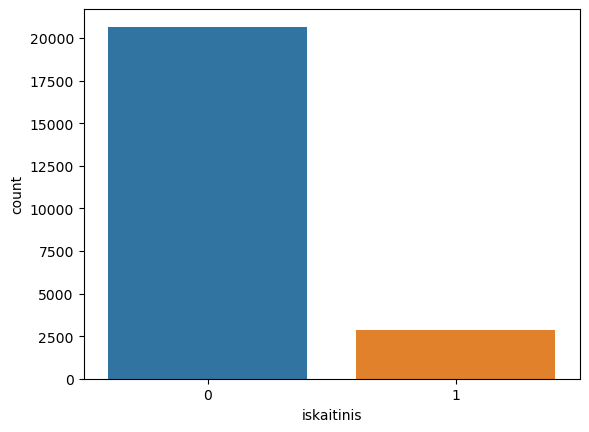

In [47]:
sns.countplot(x=df['iskaitinis'])
plt.show()

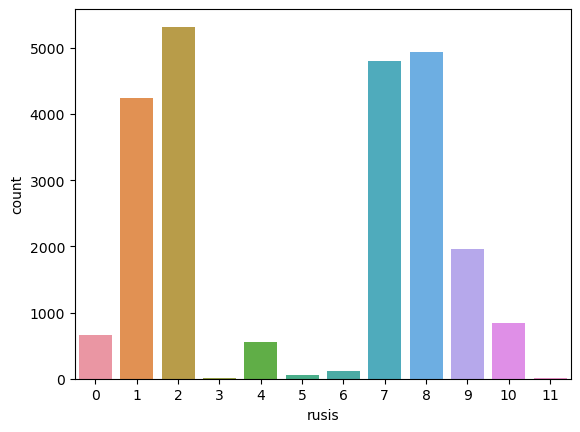

In [56]:
sns.countplot(x=df['rusis'])
plt.show()

In [66]:
# df['rusis'].value_counts()


In [70]:
df['rusis'].value_counts()

rusis
2     5321
8     4934
7     4800
1     4244
9     1955
10     844
0      664
4      561
6      121
5       62
11      10
3        4
Name: count, dtype: int64

In [71]:
df['rusis1'] = df['rusis'].apply(lambda x: 1 if x == 8 else 0)

In [72]:
df['rusis1'].value_counts()

rusis1
0    18586
1     4934
Name: count, dtype: int64

In [49]:
df2 = df.drop(columns=['iskaitinis'])

c:\Users\Batia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Batia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Correlation with rusis1'}>

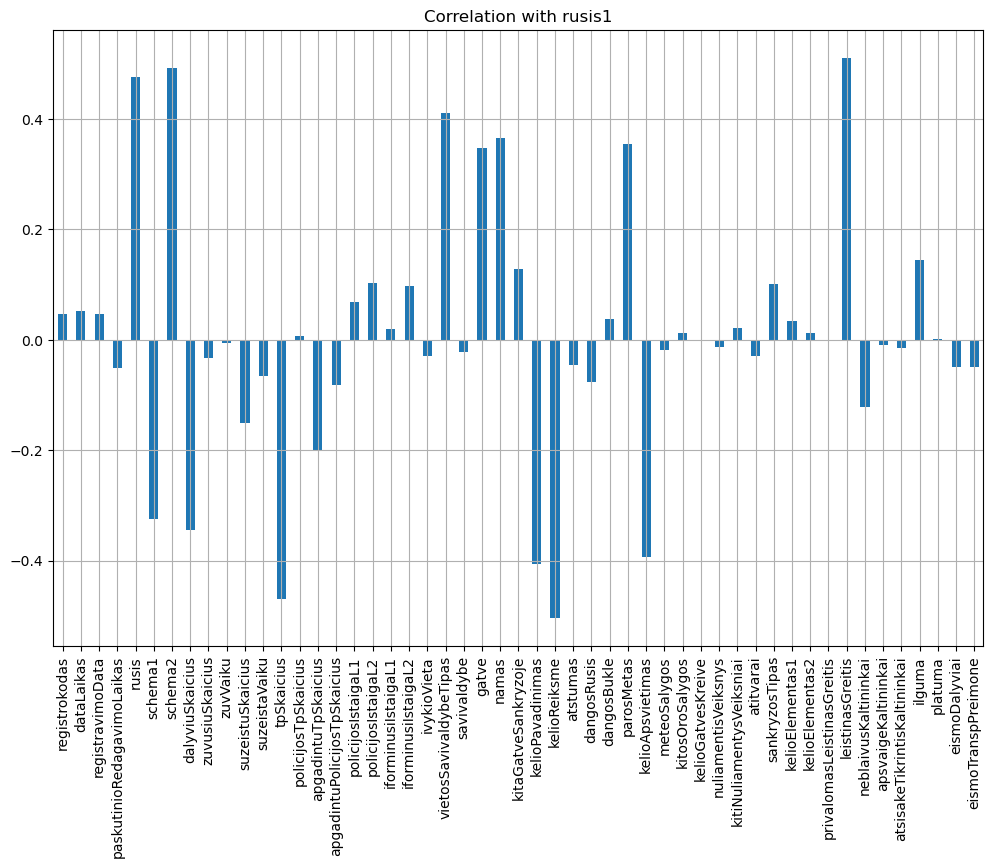

In [73]:
df2.corrwith(df['rusis1']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with rusis1")

0.8246173469387755
[[3546  175]
 [ 650  333]]


c:\Users\Batia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


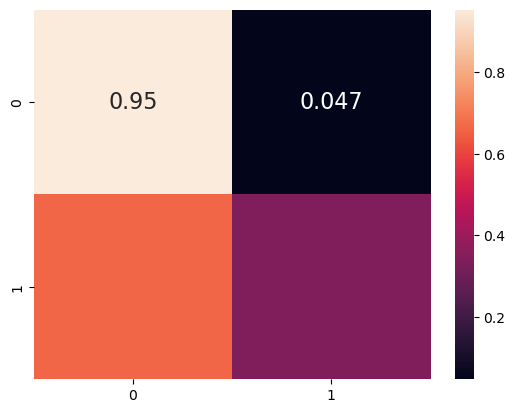

In [82]:
from sklearn.impute import SimpleImputer

X = df.drop(columns=['rusis1', 'rusis'])
y = df['rusis1']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.show()

In [ ]:
# Ar galite nustatyti kaltininko lytį, pagal pateiktas eismo įvykio aplinkybes? 
# Hipotezė - vyrai daro daugiau vienos rūšies klaidų, moterys - kitos.

In [85]:
# import ast

# def extract_gender(eismo_dalyviai):
#     try:
        
#         participants = ast.literal_eval(eismo_dalyviai)
#         genders = [participant.get('lytis') for participant in participants if 'lytis' in participant]
#         return genders
#     except (ValueError, SyntaxError, TypeError):
#         return None


# df['lytis'] = df['eismoDalyviai'].apply(extract_gender)


# df[['eismoDalyviai', 'lytis']]

,eismoDalyviai,lytis
0,"[{'dalyvisId': 47756477, 'kategorija': 'Automo...",None
1,"[{'dalyvisId': 47759080, 'kategorija': 'Automo...",None
2,"[{'dalyvisId': 47756490, 'kategorija': 'Automo...",None
3,"[{'dalyvisId': 48447053, 'kategorija': 'Automo...",None
4,"[{'dalyvisId': 47756497, 'kategorija': 'Automo...",None
...,...,...
23515,"[{'dalyvisId': 48474241, 'kategorija': 'Automo...",None
23516,"[{'dalyvisId': 48489943, 'kategorija': 'Automo...",None
23517,"[{'dalyvisId': 48474207, 'kategorija': 'Automo...",None
23518,"[{'dalyvisId': 48474230, 'kategorija': 'Automo...",None


In [86]:
df['lytis'].value_counts()

Series([], Name: count, dtype: int64)

In [88]:
lytis=[]
for i in df['eismoDalyviai']:
    try:
        lytis.append(i[0]['lytis'])
    except:
        lytis.append(None)

df['lytis'] = lytis

In [93]:
df['lytis']

0        0
1        2
2        0
3        0
4        1
        ..
23515    1
23516    1
23517    1
23518    0
23519    1
Name: lytis, Length: 23520, dtype: int32

In [99]:
df['lytis'].value_counts()

lytis
1    14551
0     5783
2     3186
Name: count, dtype: int64

In [102]:
df['lytis'].value_counts()

lytis
1    14551
0     5783
2     3186
Name: count, dtype: int64

In [105]:
df = df[df['lytis'] != 2]


print(df['lytis'].value_counts())

lytis
1    14551
0     5783
Name: count, dtype: int64


c:\Users\Batia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Batia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Correlation with lytis'}>

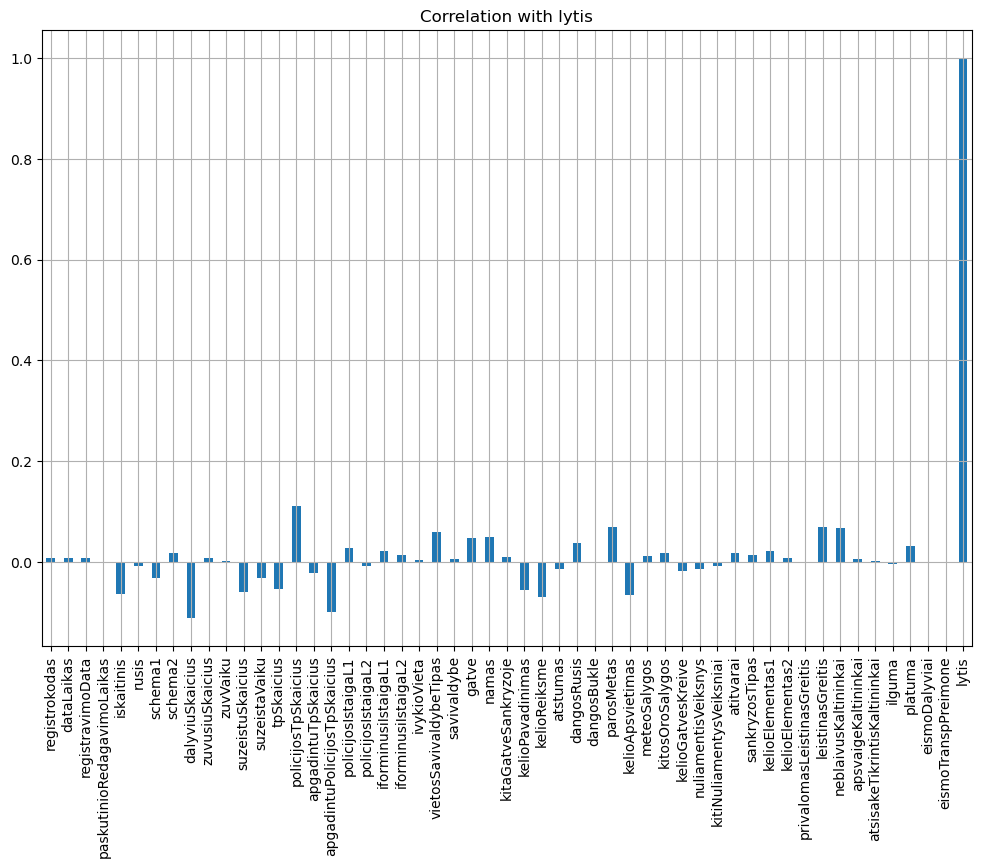

In [106]:
df.corrwith(df['lytis']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with lytis")

0.7216621588394394
[[   0 1132]
 [   0 2935]]


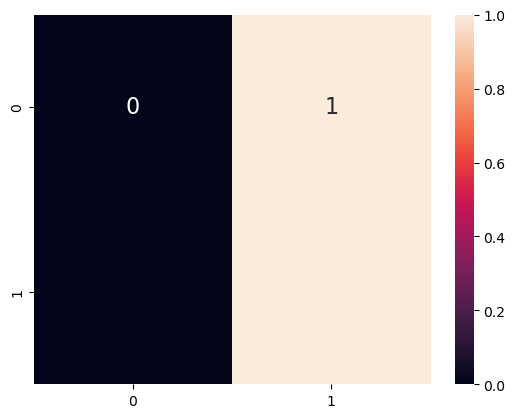

In [111]:
# X = df.drop(columns=['lytis'])
X = df.drop(columns=['lytis'])
y = df['lytis']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.show()